In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

# BASIC QUESTIONS

### Q1 - How many unique students are included in the dataset?

In [3]:
# As dataset is cleaned it equal to number of rows.
df.shape[0]

2312

Solution:

Total 2312 unique students are present in dataset.

### Q2 - What is the average cgpa of the students?

In [4]:
df['cgpa'].mean()

8.038494809688581

Solution:

Average CGPA of students is 8.03

### Q3 - What is the distribution of students across different graduation years?

year of graduation
2023    728
2024    730
2025    600
2026    254
Name: first name, dtype: int64


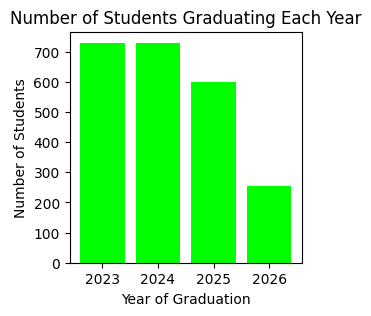

In [5]:
group = df.groupby('year of graduation')
distribution_of_students = group['first name'].agg('count')  # count to count the rows for each group
print(distribution_of_students)
# try to draw visualisation
plt.figure(figsize=(3, 3))
plt.bar(distribution_of_students.index , distribution_of_students.values , color = 'lime')
plt.xlabel('Year of Graduation')
plt.ylabel('Number of Students')
plt.title('Number of Students Graduating Each Year')
plt.show()

# Concept
# distribution_of_students = group['first name'].agg('count')
# type(distribution_of_students) is pandas series with index and values use that to create plots.

### Q4 - What is the distribution of student's experience with Python Programing

experience with python (months)
5    599
7    533
3    469
4    385
6    184
8    142
Name: first name, dtype: int64


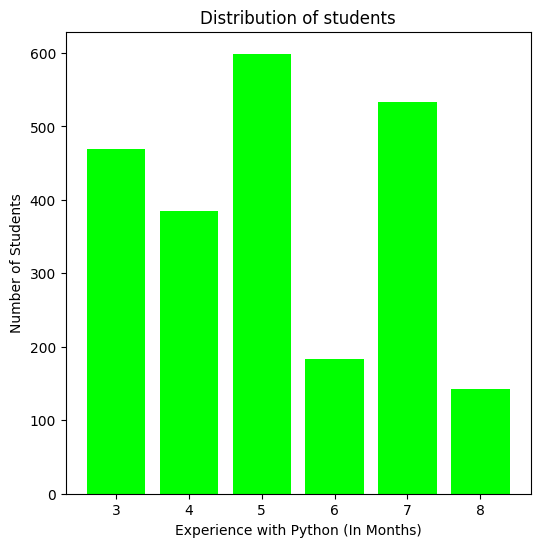

In [6]:
df['experience with python (months)'].unique()
group_one = df.groupby('experience with python (months)')
dist_of_students_knowing_python = group_one['first name'].agg('count').sort_values(ascending = False)
print(dist_of_students_knowing_python)

# visualisation
plt.figure(figsize=(6, 6))
plt.bar(dist_of_students_knowing_python.index , dist_of_students_knowing_python.values , color = 'lime')
plt.xlabel('Experience with Python (In Months)')
plt.ylabel('Number of Students')
plt.title('Distribution of students')
plt.show()

### Q5 - What is the average family income of the student?

In [7]:

print(df['family_income_calculated'].mean(),'Lakhs')

2.278114186851211 Lakhs


Solution:
Average Family Income is 2.27 Lakhs.

### Q6 - How does gpa vary among different colleges ( show top 5 results only)

In [8]:
group_two = df.groupby('college name')
variation_in_gpa = group_two['cgpa'].agg('mean').sort_values(ascending = False)[:5]
variation_in_gpa.to_string


<bound method Series.to_string of college name
st xavier's college                                                     8.282895
new horizon institute of technology and management                      8.248837
don bosco college of engineering fatorda goa                            8.224390
b. k. birla college of arts, science & commerce (autonomous), kalyan    8.192373
symbiosis institute of technology, pune                                 8.179012
Name: cgpa, dtype: float64>

Solution:
Top 5 colleges with average gpa of students:
- st xavier's college                                                     8.282895
- new horizon institute of technology and management                      8.248837
- don bosco college of engineering fatorda goa                            8.224390
- b. k. birla college of arts, science & commerce (autonomous), kalyan    8.192373
- symbiosis institute of technology, pune                                 8.179012

### Q7 - Are there any outliers in the quantity(number of courses completed) attribute

In [9]:
df['quantity'].unique()

array([1], dtype=int64)

As you can see that the quantity column has only one unique value i.e 1 so no outliers.

### Q8 - What is the average gpa for student from each city

In [10]:
group_three = df.groupby('city')
average_gpa_for_each_city = group_three['cgpa'].agg('mean')
average_gpa_for_each_city = average_gpa_for_each_city.sort_values(ascending = False).reset_index()
average_gpa_for_each_city

,city,cgpa
0,Delhi,9.014286
1,Sonipat,8.712500
2,konark,8.650000
3,Hisar,8.592857
4,Panji,8.571429
...,...,...
172,Dhar,7.312500
173,New Delhi,7.312500
174,Patna,7.300000
175,Daman,7.114286


The above dataframe contains the city and the average gpa cgpa for each city.

### Q9 - Can we identify any relationship between family income and gpa

In [11]:
df.loc[:,['family_income_calculated' , 'cgpa']].corr()

,family_income_calculated,cgpa
family_income_calculated,1.000000,0.013817
cgpa,0.013817,1.000000


These two columns have very low co relation of 0.014 - so there is no relationship in them.

# MODERATE QUESTIONS


### Q10 - How many students from various cities? (solve by visualisation)

          city  first name
29     Bikaner          27
10        Amer          27
73       Jalor          27
80     Jodhpur          27
34  Chandigarh          26


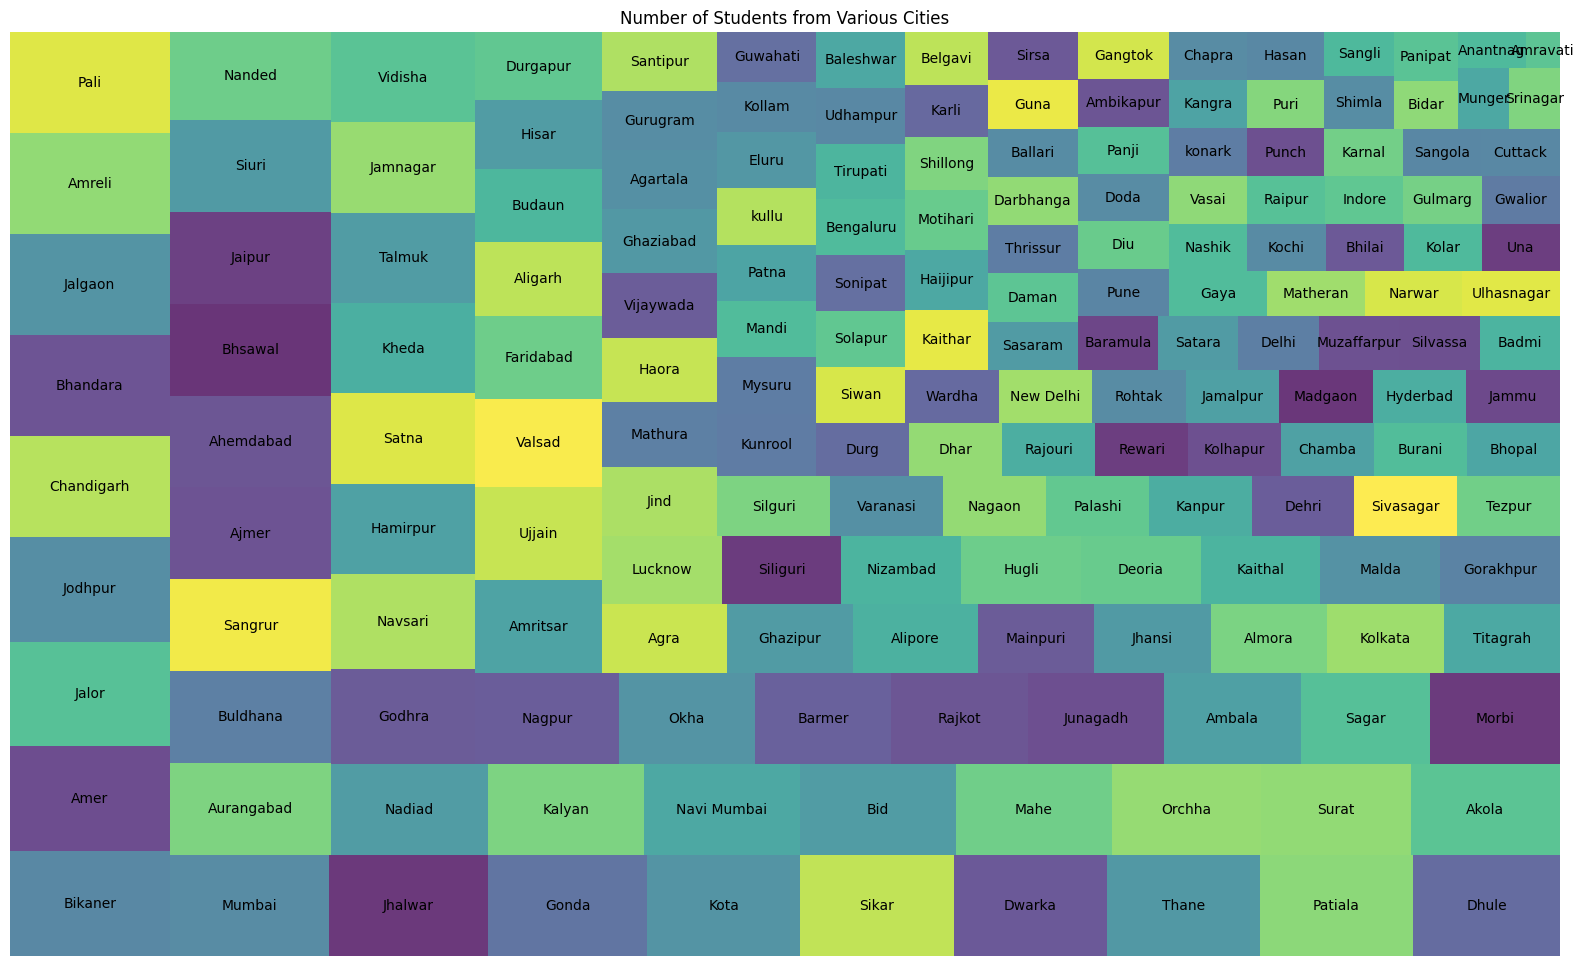

In [12]:
group_four = df.groupby('city')
students_from_diff_city = group_four['first name'].agg('count')

students_var = students_from_diff_city.reset_index()
print(students_var.sort_values(by = ['first name'] ,ascending = False)[0:5]) # Top 5 cities
students_var.columns = ['City', 'Count']

# sorting for better visualisation
students_var = students_var.sort_values(by = ['Count'], ascending = False)
# Create a treemap
plt.figure(figsize=(20, 12))
squarify.plot(sizes=students_var['Count'], label=students_var['City'], alpha=0.8)
plt.axis('off')
plt.title('Number of Students from Various Cities')
plt.show()

### Q11 -  Which event tend to attract more students from specific fields of study.

Solution:
Art of Resume Building


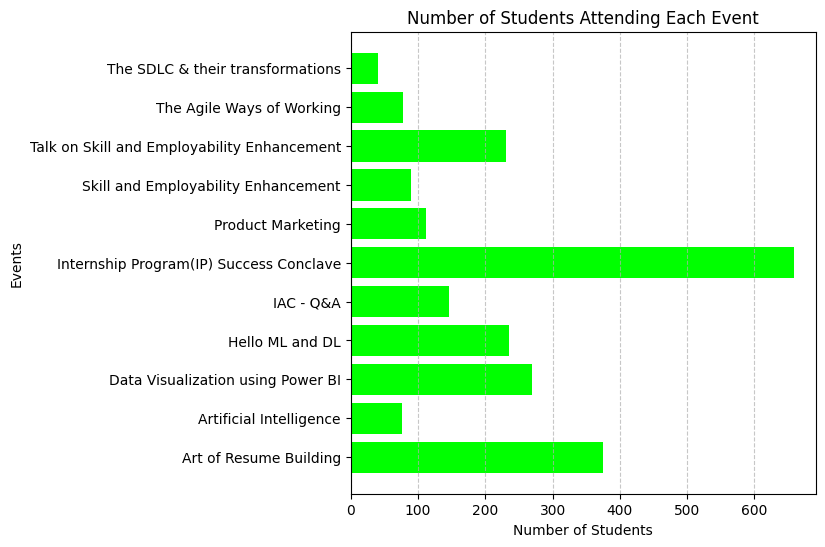

In [13]:

group_five = df.groupby('events')
no_of_students_attending_event = group_five['first name'].agg('count')
no_of_students_attending_event = no_of_students_attending_event.reset_index()
print('Solution:')
print(no_of_students_attending_event.iloc[0,0])

# visualisation
plt.figure(figsize=(6, 6))
plt.barh(no_of_students_attending_event['events'], no_of_students_attending_event['first name'], color='lime')
plt.xlabel('Number of Students')
plt.ylabel('Events')
plt.title('Number of Students Attending Each Event')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Q12 - Do students in leadership positions during their college year tend to have higher GPAs or better expected salary?

In [14]:
# df.columns
df_new = df.copy()
df['leadership- skills'] = df['leadership- skills'].replace({
'yes': 1,
'no' : 0,
'no ' : 0
})

grp_leadership = df_new.groupby('leadership- skills')
print(grp_leadership['cgpa'].agg(('median'))) # considering median and not mean because it divides the data into two parts propely

grp_expected_salary = df_new.groupby('leadership- skills')
print(grp_expected_salary['expected salary (lac)'].agg(('median')))

leadership- skills
no     7.9
no     7.8
yes    7.9
Name: cgpa, dtype: float64
leadership- skills
no     12.0
no     13.0
yes    13.0
Name: expected salary (lac), dtype: float64


C:\Users\TEJUS PAL\AppData\Local\Temp\ipykernel_23868\4251090997.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['leadership- skills'] = df['leadership- skills'].replace({


Solution:- 
- The median cgpa of students with leadership and without leadership skills is same. 
- The median expected salary of the students with leadership skills is higher as compared to the students without leadership skills.

Conclusion: 
- The students with leadership skill tend to have higher expected salary than students without leadership skills.
- But it doesn't affect the cgpa


In [15]:
df.columns

Index(['first name', 'email id', 'quantity', 'events', 'attendee status',
       'college name', 'how did you come to know about this event?',
       'designation', 'year of graduation', 'city', 'cgpa',
       'experience with python (months)', 'family income',
       'expected salary (lac)', 'leadership- skills',
       'family_income_calculated'],
      dtype='object')

### Q13 - How many students are graduation by the end of year 2024

In [16]:
group_six = df.groupby('year of graduation')
group_six['first name'].agg('count')

year of graduation
2023    728
2024    730
2025    600
2026    254
Name: first name, dtype: int64

Solution:

730 students are graduating by the end of year 2024

### Q14 - Which promotion channel brings in more student participants for the event

                     Channel  No_of_Students
0                   Whatsapp            1711
1                      Email             268
2   Cloud Counselage Website              71
3    SPOC/ College Professor              71
4                    Youtube              55
5                   LinkedIn              40
6                    College              34
7                   Facebook              25
8                  Instagram              15
9          Friend/ Classmate              11
10                   Friends               4
11                  Telegram               3
12              From Academy               1
13                 Institute               1
14               Team entity               1
15                   Twitter               1



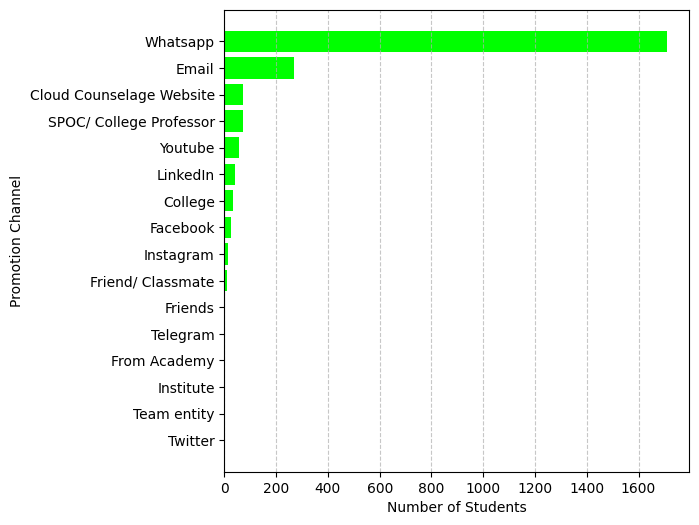

In [17]:

group_seven = df.groupby('how did you come to know about this event?')
promotion_channel = group_seven['first name'].agg('count').sort_values(ascending = False)
promotion_channel = promotion_channel.reset_index()
promotion_channel.columns = ['Channel' , 'No_of_Students']
print(promotion_channel)
print()
# visualisation
plt.figure(figsize=(6, 6))
plt.barh(promotion_channel['Channel'],promotion_channel['No_of_Students'], color='lime')
plt.xlabel('Number of Students')
plt.ylabel('Promotion Channel')
plt.title('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

Solution:
Whatsapp bring the most student participation to events as compated to other platforms.

### Q15 - Find total number of students who attended the events related to Data Science

In [18]:
print(df['events'].value_counts())
# from this we came to know these course are related to data science are as follows Data Visualization using Power BI ,Hello ML and DL and Artificial Intelligence
# create a function which will check the value of the cell and if its is one of the three then we will count
counter = 0
checker_list = ['Data Visualization using Power BI','Hello ML and DL','Artificial Intelligence']
def counter_func(cell):
    global counter
    if cell in checker_list:
        counter += 1
# passing the function to the events column
df['events'].map(counter_func)
print('The number of students who attended courses related to Data Science ' , counter)

events
Internship Program(IP) Success Conclave        658
Art of Resume Building                         375
Data Visualization using Power BI              270
Hello ML and DL                                235
Talk on Skill and Employability Enhancement    231
IAC - Q&A                                      146
Product Marketing                              112
Skill and Employability Enhancement             89
The Agile Ways of Working                       78
Artificial Intelligence                         77
The SDLC & their transformations                41
Name: count, dtype: int64
The number of students who attended courses related to Data Science  582


Total students who attended courses related to Data Science are 582.

### Q17 - How many students know about the event from their college? Which of these top 5 colleges?

In [19]:
ans_q18 = df[df['how did you come to know about this event?'] == 'SPOC/ College Professor']
print(ans_q18.shape[0])  # the number of row will be the number of students who came to know about event from their college.
print()
# To know top 5 colleges
group_eight = ans_q18.groupby('college name')
solution = group_eight['first name'].agg('count')[:5]
solution = solution.reset_index()
solution.columns = ['College Name','No of Students']
solution[:5]


71



,College Name,No of Students
0,a. c. patil college of engineering,4
1,adhiyamaan college of engineering,2
2,"b. k. birla college of arts, science & commerc...",3
3,chhattisgarh swami vivekananda technical unive...,1
4,dkte society's textile and engineering institu...,4


Solution:

In total 71 students came to know about the events from their college.
Top 5 colleges are as follows:
1) a. c. patil college of engineering
2) adhiyamaan college of engineering
3) b. k. birla college of arts, science & commerce (autonomous), kalyan 
4) chhattisgarh swami vivekananda technical university teaching department bhilai
5) dkte society's textile and engineering institute ichalkaranji	
